In [1]:
from skyfield.api import Star, Topos, load
from skyfield.data import hipparcos
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
figsize = (20,20)

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)
    
stardict = {}
with open('common_stars.txt') as f:
    lines = f.readlines()
    for line in lines:
        entry = line.strip().split("\t")
        stardict[int(entry[1])] = entry[0]
        stardict[int(entry[3])] = entry[2]

df = df[df['magnitude'] <= 3.0]
print('After filtering, there are {} stars'.format(len(df)))
bright_stars = Star.from_dataframe(df)

planets = load('de421.bsp')
earth = planets['earth']
ts = load.timescale()



After filtering, there are 177 stars


In [2]:
def getHistogram(hips, xs, ys, mags):
    pass
    

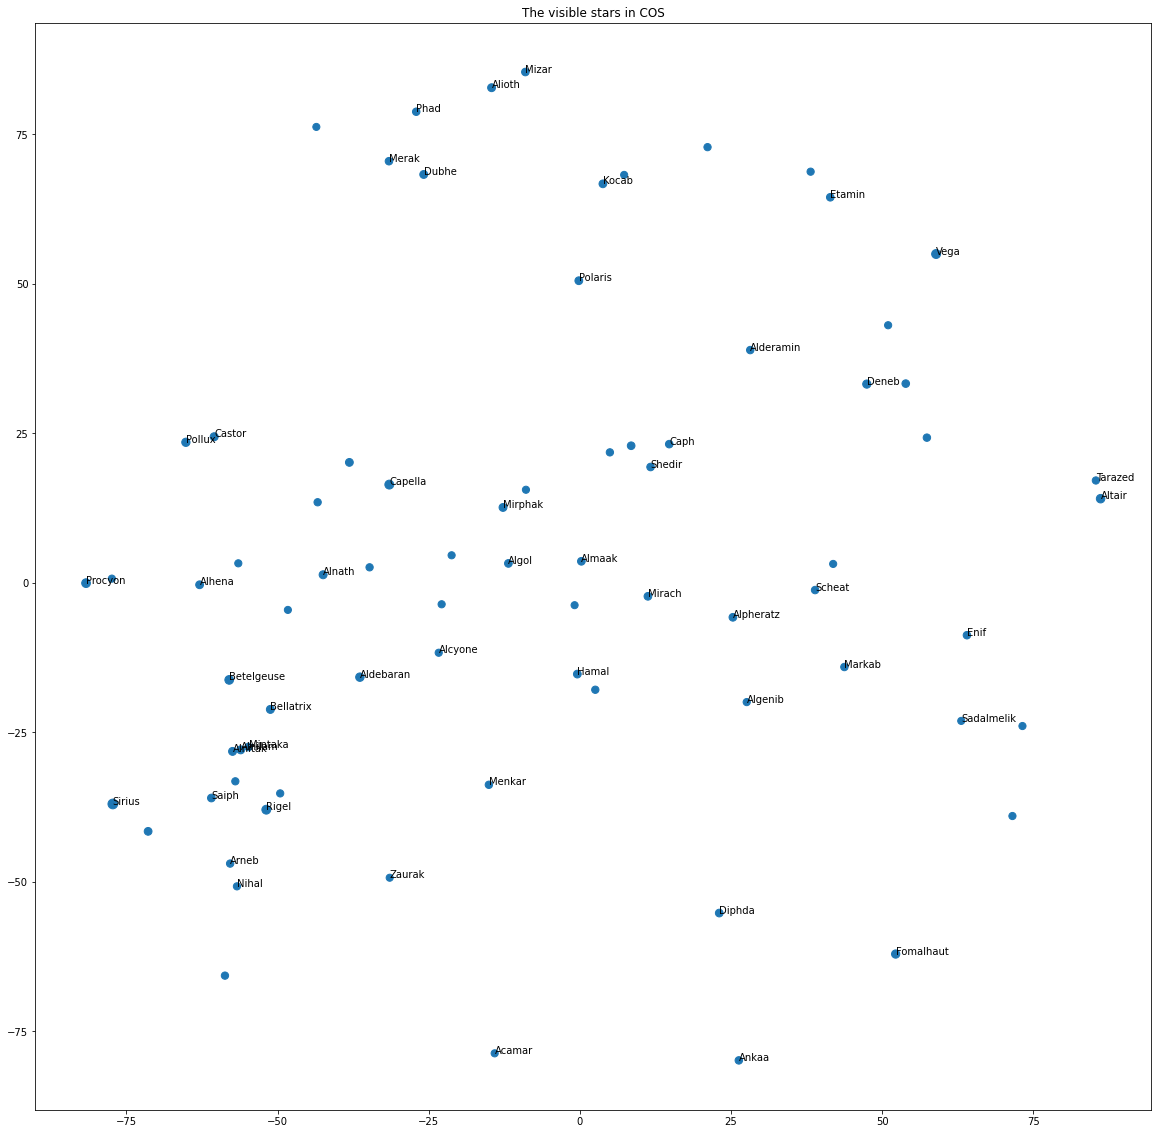

In [3]:
fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(121,projection='polar')
ax2 = fig.add_subplot(111)
cos = earth + Topos('38.8605998 N', '104.6751112 W', elevation_m=2000)

for cnt in range(1):
    t = ts.utc(2020, 11, 26, 4,42+cnt,58)
#     print(t)
#     astrometric = boston.at(t).observe(bright_stars)
    apparent = cos.at(t).observe(bright_stars).apparent()
#     ra, dec, distance = apparent.radec('date')
    alt,az,distance = apparent.altaz()
    az_deg = np.pi*np.array(az.degrees + 90) / 180
#     ax.scatter(az_deg, 90 - alt.degrees, 50*df['magnitude'], 'k')
    hips = df.index
    rad = 90 - alt.degrees
    idxs = np.where(rad < 90)
    mag = np.array(10*(8-df['magnitude']))
    x = rad[idxs]*np.cos(az_deg[idxs])
    y = rad[idxs]*np.sin(az_deg[idxs])
    hipvals = hips[idxs]
    ax2.scatter(x, y,mag[idxs])
    
    
    if cnt == 0:
        for idx,hip in enumerate(hipvals):
            if hip in stardict:
                ax2.annotate(stardict[hip], (x[idx], y[idx]))
# ax.set_xlim(7.0, 4.0)
# ax.set_ylim(0, 90)
# ax.set_rmin(0)
# ax.set_rmax(90)
# ax.grid(True)
ax2.set(title='The visible stars in COS')
plt.show()

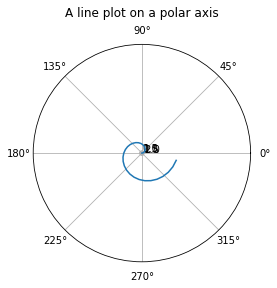

In [4]:
r = 90 - np.arange(90, 60, -1)
theta = 2 * np.pi * r/(30)

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmin(0)
ax.set_rmax(90)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()